# Compare performance of models
Test MSE for dataset finalData2 with a 2:1 train-test split
- Linear regression: 902.06
- NN-Uncorrelated: 730.711
- NN-All-features: 463.344
- XGBoost: 72.0


<BarContainer object of 4 artists>

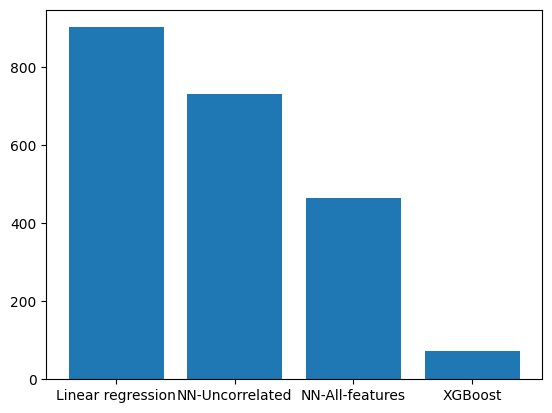

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
models = ["Linear regression", "NN-Uncorrelated", "NN-All-features", "XGBoost"]
errors = [ 902.06 ,730.711,463.344,72.0]
plt.bar(models,errors)

# Compare models for predicting a specific week
## Get data for a week

In [83]:
import pandas as pd
df = pd.read_csv("../data/finalData2.csv")
df['time'] = pd.to_datetime(df['time'])
df.drop(['oerlikon', 'Unnamed: 0'],inplace=True, axis = 1)
start = pd.to_datetime("2024-04-22 00:00:00")
stop =  start + pd.DateOffset(days=1)
target_week = df.where(df['time'] >= start).where(df['time'] <= stop).dropna()
target_week_X = target_week.drop(["city", "time"], axis = 1)
target_week_y = target_week['city']


#### Linear regression prediction

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv("../data/finalData2.csv")
df['time'] = pd.to_datetime(df['time'])
time = df['time']
df.drop(['oerlikon', 'time', 'Unnamed: 0'], inplace=True, axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df.drop('city', axis = 1), df['city'], test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
linreg = reg.predict(target_week_X)


#### NN-Uncorelated



In [85]:
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras
model_uncorrel = keras.models.load_model("../models/uncorrel.keras")
df_uncorr = pd.read_csv("../data/uncor_features.csv")
mask = time >= start 
mask = mask & (time <= stop)
target_week_uncorr = df_uncorr[mask]
target_week_uncorr = target_week_uncorr.drop(["city"], axis = 1)
NN_uncorr = model_uncorrel.predict(target_week_uncorr)


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### NN - all features

In [86]:
model_all = keras.models.load_model("../models/NN-all_features.keras")
NN_all = model_all.predict(target_week_X)


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


#### XGBoost

In [100]:
import xgboost as xgb
reg = xgb.XGBRegressor()
reg.fit(X_train.astype("float"), y_train.astype("float"))
xgboost_pred = reg.predict(target_week_X.astype("float"))

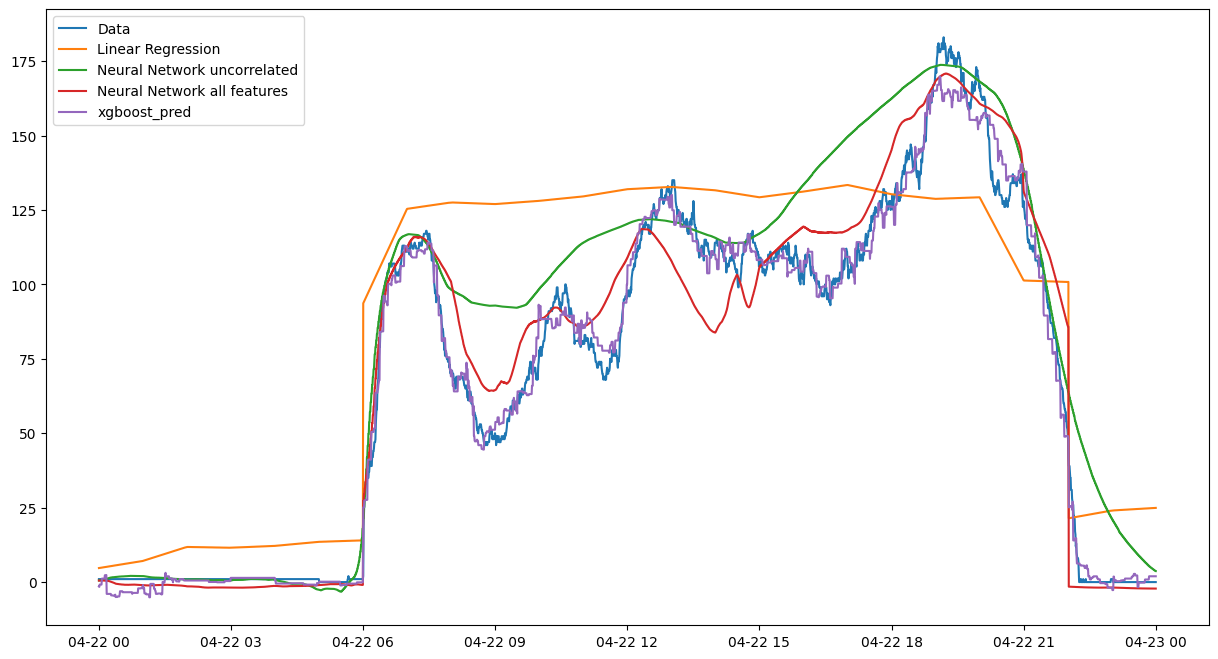

In [101]:
plt.figure(figsize=(15,8))
plt.plot(target_week['time'], target_week_y, label='Data')
plt.plot(target_week['time'], linreg, label='Linear Regression')
plt.plot(target_week['time'], NN_uncorr, label='Neural Network uncorrelated')
plt.plot(target_week['time'], NN_all, label='Neural Network all features')
plt.plot(target_week['time'], xgboost_pred, label='XGBoost')
plt.legend(loc='best')

plt.show()

XGBoost seems to good to be true. Maybe overfitted?  Be aware that models have seen data already during training. -> not proper predictions. --> Proper timebased crossvalidation.

In [67]:
type(stop)

pandas._libs.tslibs.timestamps.Timestamp

In [98]:
target_week_X.dtypes

weekday                       float64
minutes_since_midnight        float64
opened                         object
temperature_2m (°C)           float64
relative_humidity_2m (%)      float64
apparent_temperature (°C)     float64
precipitation (mm)            float64
cloud_cover (%)               float64
wind_speed_10m (km/h)         float64
shortwave_radiation (W/m²)    float64
is_day ()                     float64
dtype: object

In [99]:
X_train.dtypes

weekday                         int64
minutes_since_midnight          int64
opened                           bool
temperature_2m (°C)           float64
relative_humidity_2m (%)      float64
apparent_temperature (°C)     float64
precipitation (mm)            float64
cloud_cover (%)               float64
wind_speed_10m (km/h)         float64
shortwave_radiation (W/m²)    float64
is_day ()                     float64
dtype: object